In [1]:
# !pip install seaborn,numpy,seaborn,IPython
import os
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display
display.set_matplotlib_formats('svg')
info_path = '/media/jw11/jw13/data/converter_data/AT128_0503/PVB_infos_val_01sweeps_withoutvelo_filter_True.pkl'

/home/jw11/miniconda3/envs/openmmlab/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  if __name__ == '__main__':


# Reader

In [2]:
with open(info_path,'rb') as f:
    data_infos = pickle.load(f)

In [3]:
print('=======================Frames is {}========================================'.format(len(data_infos)))

=======================Frames is 34130========================================


In [4]:
data_infos[33495] is None

True

In [5]:
gt_boxes = list()
gt_names = list()

for i,data_info in enumerate(data_infos):
    if data_info:
        gt_boxes.append(data_info['gt_boxes'])
        gt_names.append(data_info['gt_names'])
        
        

gt_boxes = np.concatenate(gt_boxes,axis=0)
gt_names = np.expand_dims(np.concatenate(gt_names,axis=0),axis=1)
distance = np.linalg.norm(gt_boxes[:,0:2], axis=1).reshape(-1,1)
ground_truth = np.concatenate((gt_names,gt_boxes,distance),axis=1)
columns_index = ['type','x', 'y', 'z', 'w', 'l', 'h', 'yaw','distance']
ground_truth = pd.DataFrame(ground_truth,columns=columns_index)
ground_truth.head()
ground_truth.dtypes

type        object
x           object
y           object
z           object
w           object
l           object
h           object
yaw         object
distance    object
dtype: object

In [6]:
ground_truth

,type,x,y,z,w,l,h,yaw,distance
0,vehicle,-51.88,-2.8,0.56,1.92,4.41,1.48,-1.591,51.97
1,vehicle,-33.53,-3.02,0.77,2.05,4.5,1.76,-7.82,33.66
2,vehicle,-29.77,3.53,0.85,2.03,4.58,1.8,-1.591,29.97
3,vehicle,-16.72,-3.08,0.65,2.06,4.36,1.46,-1.61,17.0
4,vehicle,-15.21,0.38,0.82,2.18,4.47,1.76,-7.85,15.22
...,...,...,...,...,...,...,...,...,...
1520798,vehicle,-23.4,-5.016,0.65,2.07,4.363,1.41,-1.586,23.94
1520799,vehicle,-164.1,-10.5,0.831,1.985,4.52,1.52,-1.588,164.5
1520800,vehicle,63.53,2.389,0.6396,2.104,4.934,1.473,-1.579,63.56
1520801,vehicle,182.8,12.18,0.1326,2.018,4.367,1.415,-1.578,183.2


In [7]:
# converter the currency into float
currency = ['x', 'y', 'z', 'w', 'l', 'h', 'yaw','distance']
for c in currency:
    ground_truth[c] = ground_truth[c].astype(float)

In [8]:
mask = np.logical_and(ground_truth['distance']<50, ground_truth['distance']>0)
mask = np.logical_and(mask,ground_truth['type']=='vehicle')
print('vehicle(0~50): \n',ground_truth[mask].describe())
mask = np.logical_and(ground_truth['distance']<100, ground_truth['distance']>50)
mask = np.logical_and(mask,ground_truth['type']=='vehicle')
print('vehicle(50~100): \n',ground_truth[mask].describe())
mask = np.logical_and(ground_truth['distance']>100, ground_truth['distance']<200)
mask = np.logical_and(mask,ground_truth['type']=='vehicle')
print('vehicle(100~200): \n',ground_truth[mask].describe())

vehicle(0~50): 
                    x              y              z              w  \
count  532742.000000  532742.000000  532742.000000  532742.000000   
mean        0.351492       2.410554       0.855054       1.952409   
std        25.448296      16.721116       0.454256       0.153240   
min       -49.970000     -49.970000      -7.652000       0.044800   
25%       -19.970000      -6.316000       0.670000       1.848000   
50%         0.369400       1.640000       0.846000       1.939000   
75%        20.750000      12.310000       1.030000       2.049000   
max        49.970000      49.970000       9.914000       7.867000   

                   l              h            yaw       distance  
count  532742.000000  532742.000000  532742.000000  532742.000000  
mean        4.429333       1.619565      -4.457610      27.962584  
std         0.299835       0.192408       2.380064      12.298184  
min         0.000000       0.000000      -7.855000       0.797400  
25%         4.270000 

In [9]:
mask = np.logical_and(ground_truth['distance']<50, ground_truth['distance']>0)
mask = np.logical_and(mask,ground_truth['type']=='pedestrian')
print('pedestrian(0~50): \n',ground_truth[mask].describe())
mask = np.logical_and(ground_truth['distance']<100, ground_truth['distance']>50)
mask = np.logical_and(mask,ground_truth['type']=='pedestrian')
print('pedestrian(50~100): \n',ground_truth[mask].describe())
mask = np.logical_and(ground_truth['distance']>100, ground_truth['distance']<200)
mask = np.logical_and(mask,ground_truth['type']=='pedestrian')
print('pedestrian(100~200): \n',ground_truth[mask].describe())

pedestrian(0~50): 
                    x              y              z              w  \
count  201908.000000  201908.000000  201908.000000  201908.000000   
mean        0.122638      -5.679014       1.059193       0.597972   
std        23.186607      20.132629       0.482223       0.271462   
min       -49.970000     -49.970000      -4.406000       0.000000   
25%       -17.550000     -17.780000       0.827000       0.520000   
50%         0.177600     -12.445000       1.080000       0.590000   
75%        17.390000       4.044000       1.297000       0.662600   
max        49.840000      49.970000       8.380000     109.700000   

                   l              h            yaw       distance  
count  201908.000000  201908.000000  201908.000000  201908.000000  
mean        0.566323       1.620961      -4.721940      29.323789  
std         0.192185       0.122199       2.011351      10.739138  
min         0.000000       0.000000      -7.855000       0.474000  
25%         0.4639

In [10]:
mask = np.logical_and(ground_truth['distance']<50, ground_truth['distance']>0)
mask = np.logical_and(mask,ground_truth['type']=='big_vehicle')
print('big_vehicle(0~50): \n',ground_truth[mask].describe())
mask = np.logical_and(ground_truth['distance']<100, ground_truth['distance']>50)
mask = np.logical_and(mask,ground_truth['type']=='big_vehicle')
print('big_vehicle(50~100): \n',ground_truth[mask].describe())
mask = np.logical_and(ground_truth['distance']>100, ground_truth['distance']<200)
mask = np.logical_and(mask,ground_truth['type']=='big_vehicle')
print('big_vehicle(100~200): \n',ground_truth[mask].describe())

big_vehicle(0~50): 
                   x             y             z             w             l  \
count  68432.000000  68432.000000  68432.000000  68432.000000  68432.000000   
mean       0.422837      5.259597      1.696230      2.856515      9.743040   
std       26.800913     17.439376      0.502014      0.423727      3.392569   
min      -49.970000    -49.900000     -6.670000      0.178300      0.000000   
25%      -22.250000     -5.438000      1.438000      2.640000      6.746000   
50%        0.797200      3.230000      1.697000      2.908000      9.460000   
75%       23.060000     18.280000      1.953000      3.080000     11.790000   
max       49.940000     49.970000      7.727000     16.500000     36.530000   

                  h           yaw      distance  
count  68432.000000  68432.000000  68432.000000  
mean       3.300659     -4.439494     29.999159  
std        0.606634      2.315795     12.260120  
min        0.000000     -7.855000      0.240200  
25%        2.9380

In [11]:
mask = np.logical_and(ground_truth['distance']<50, ground_truth['distance']>0)
mask = np.logical_and(mask,ground_truth['type']=='bicycle')
print('bicycle(0~50): \n',ground_truth[mask].describe())
mask = np.logical_and(ground_truth['distance']<100, ground_truth['distance']>50)
mask = np.logical_and(mask,ground_truth['type']=='bicycle')
print('bicycle(50~100): \n',ground_truth[mask].describe())
mask = np.logical_and(ground_truth['distance']>100, ground_truth['distance']<200)
mask = np.logical_and(mask,ground_truth['type']=='bicycle')
print('bicycle(100~200): \n',ground_truth[mask].describe())

bicycle(0~50): 
                    x              y              z              w  \
count  107484.000000  107484.000000  107484.000000  107484.000000   
mean        0.290633      -0.507915       0.819877       0.789873   
std        24.213057      17.133638       0.391457       0.172887   
min       -49.970000     -49.530000      -4.270000       0.197900   
25%       -18.390000     -11.580000       0.654300       0.690000   
50%         0.842650      -5.793000       0.846000       0.769500   
75%        18.600000      11.092500       1.026000       0.852500   
max        49.970000      49.940000       6.360000       6.250000   

                   l              h            yaw       distance  
count  107484.000000  107484.000000  107484.000000  107484.000000  
mean        1.744188       1.588588      -4.560961      27.137841  
std         0.374010       0.137053       2.279210      11.988093  
min         0.006000       0.137700      -7.855000       1.503000  
25%         1.610000 

# Clean

In [12]:
abnormal =  (ground_truth['z'] < -10) | (ground_truth['z'] > 10) | (ground_truth['w'] < 0.1) |  (ground_truth['w'] > 10) | (ground_truth['l'] < 0.1) |  (ground_truth['l'] > 25) \
    | (ground_truth['h'] < 0.2) |  (ground_truth['h'] > 10) | (ground_truth['l'] < 0.02) |  (ground_truth['l'] > 25)
sum(abnormal)

425

In [27]:
ground_truth[abnormal][:50]

,type,x,y,z,w,l,h,yaw,distance
9570,vehicle,160.00,26.55,10.07,2.52,4.53,1.44,-4.690,162.10
9943,big_vehicle,54.03,12.15,2.31,3.56,34.97,3.76,-4.700,55.38
9971,big_vehicle,-6.88,12.49,1.88,3.14,35.75,3.75,-4.700,14.26
9992,big_vehicle,-58.12,12.18,1.65,3.37,32.40,3.53,-4.710,59.38
11715,big_vehicle,58.75,8.92,2.87,3.00,31.73,2.82,-4.710,59.44
11770,big_vehicle,10.32,8.82,2.48,3.29,34.80,3.22,-4.723,13.57
11803,big_vehicle,-30.27,8.51,2.32,3.29,35.22,3.23,-4.723,31.44
11836,big_vehicle,-71.25,8.62,1.98,3.36,31.55,3.22,-4.723,71.75
11874,big_vehicle,-113.56,8.18,1.98,3.36,31.55,3.22,-4.723,113.80
11915,big_vehicle,-155.00,7.44,2.07,3.36,31.55,3.23,-4.723,155.10


In [14]:
# clean the attribute with nan above 30%
null_sum = ground_truth.isnull().sum()
ground_truth.columns[null_sum < len(ground_truth)*0.3]

Index(['type', 'x', 'y', 'z', 'w', 'l', 'h', 'yaw', 'distance'], dtype='object')

In [15]:
ground_truth.drop(columns=ground_truth.columns[null_sum > len(ground_truth)*0.3], inplace=True)

In [16]:
ground_truth

,type,x,y,z,w,l,h,yaw,distance
0,vehicle,-51.88,-2.800,0.5600,1.920,4.410,1.4800,-1.591,51.97
1,vehicle,-33.53,-3.020,0.7700,2.050,4.500,1.7600,-7.820,33.66
2,vehicle,-29.77,3.530,0.8500,2.030,4.580,1.8000,-1.591,29.97
3,vehicle,-16.72,-3.080,0.6500,2.060,4.360,1.4600,-1.610,17.00
4,vehicle,-15.21,0.380,0.8200,2.180,4.470,1.7600,-7.850,15.22
...,...,...,...,...,...,...,...,...,...
1520798,vehicle,-23.40,-5.016,0.6500,2.070,4.363,1.4100,-1.586,23.94
1520799,vehicle,-164.10,-10.500,0.8310,1.985,4.520,1.5200,-1.588,164.50
1520800,vehicle,63.53,2.389,0.6396,2.104,4.934,1.4730,-1.579,63.56
1520801,vehicle,182.80,12.180,0.1326,2.018,4.367,1.4150,-1.578,183.20


# VISUALIZATION

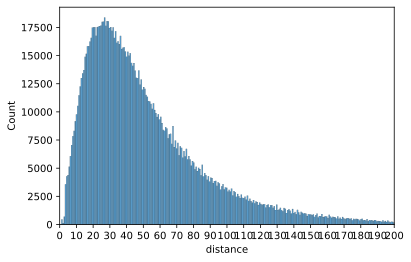

In [17]:
ax = sns.histplot(ground_truth['distance'])
ax.set_xlim([0,200])
ax.set_xticks(range(0,201,10))

Text(0.5, 0, 'width')

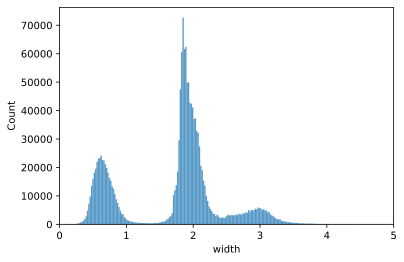

In [18]:
ax = sns.histplot(ground_truth['w'])
ax.set_xlim([0,5])
ax.set_xticks(range(0,6))
ax.set_xlabel('width')

Text(0.5, 0, 'length')

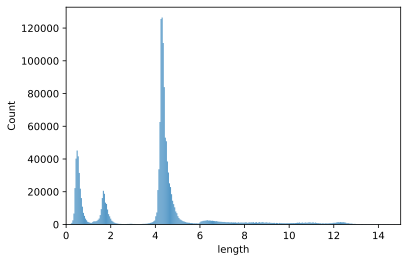

In [19]:
ax = sns.histplot(ground_truth['l'])
ax.set_xlim([0,15])
ax.set_xlabel('length')

Text(0.5, 0, 'height')

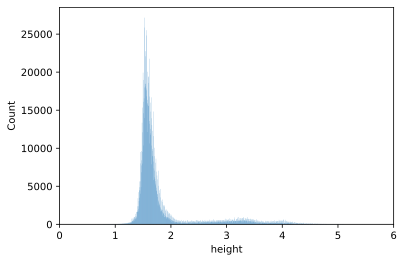

In [20]:
ax = sns.histplot(ground_truth['h'])
ax.set_xlim([0,6])
ax.set_xlabel('height')

In [21]:
ground_truth['type'].value_counts()

vehicle        913128
pedestrian     262849
big_vehicle    192511
bicycle        152315
Name: type, dtype: int64

## Count density

/home/jw11/miniconda3/envs/openmmlab/lib/python3.7/site-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try kdeplot.
  warnings.warn(msg, UserWarning)


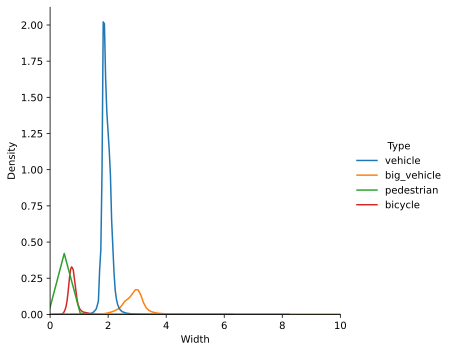

In [22]:
types = ground_truth['type'].isin(['vehicle','big_vehicle',\
    'huge_vehicle','pedestrian','electric_bicycle','bicycle','motorcycle'])
# fig, ax = plt.subplots()
ax=sns.displot(pd.DataFrame({'Width':ground_truth[types]['w'],
                          'Type':ground_truth[types]['type']}),
            x='Width',hue='Type',kind='kde',ax=ax)
plt.xlim(0,10)
plt.show()

/home/jw11/miniconda3/envs/openmmlab/lib/python3.7/site-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try kdeplot.
  warnings.warn(msg, UserWarning)


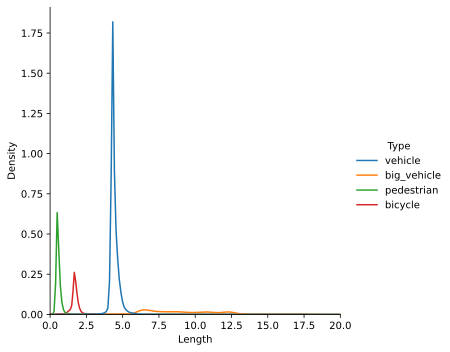

In [23]:
types = ground_truth['type'].isin(['vehicle','big_vehicle',\
    'huge_vehicle','pedestrian','electric_bicycle','bicycle','motorcycle'])
# fig, ax = plt.subplots()
ax=sns.displot(pd.DataFrame({'Length':ground_truth[types]['l'],
                          'Type':ground_truth[types]['type']}),
            x='Length',hue='Type',kind='kde',ax=ax)
plt.xlim(0,20)
plt.show()

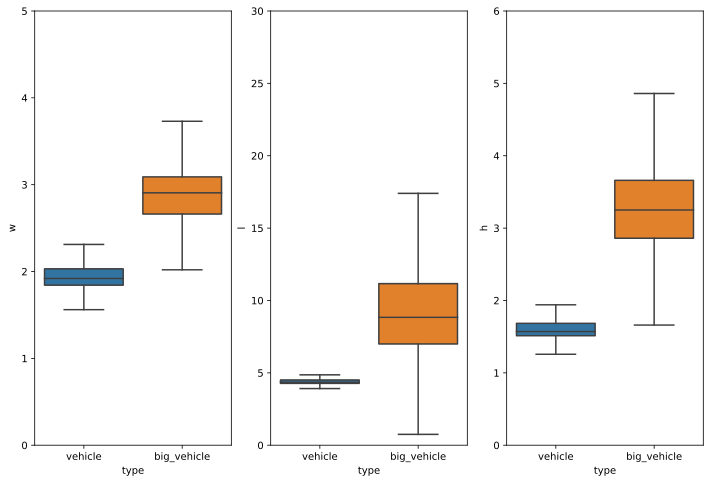

In [24]:
fig, axs = plt.subplots(1,3,figsize=(12,8))
four_wheel = ground_truth['type'].isin(['vehicle','big_vehicle',\
    'huge_vehicle'])
two_wheel = ground_truth['type'].isin(['vehicle','big_vehicle',\
    'huge_vehicle','pedestrian','electric_bicycle','bicycle','motorcycle'])
sns.boxplot(x='type', y='w',data=ground_truth[four_wheel],fliersize=0,ax=axs[0])
sns.boxplot(x='type', y='l',data=ground_truth[four_wheel],fliersize=0,ax=axs[1])
sns.boxplot(x='type', y='h',data=ground_truth[four_wheel],fliersize=0,ax=axs[2])
axs[0].set_ylim([0,5])
axs[1].set_ylim([0,30])
axs[2].set_ylim([0,6])
# axs[0].set_xticks(['b_v','h_v','v'])
plt.show()

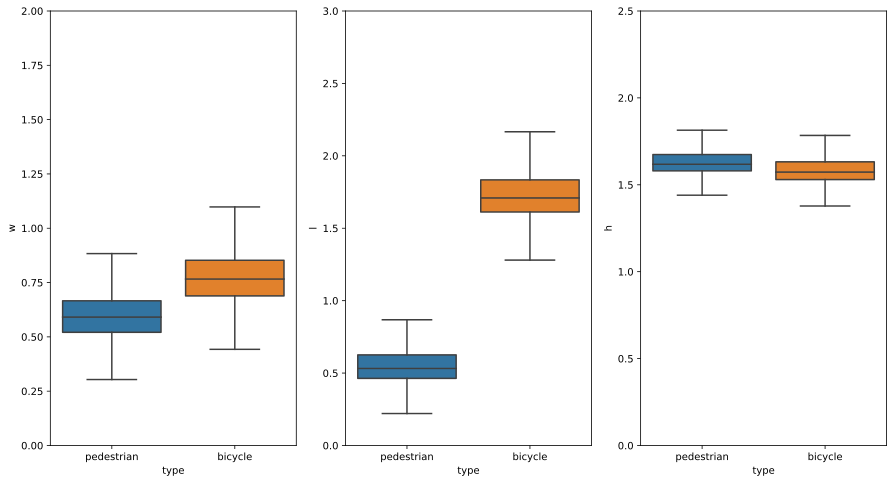

In [25]:
fig, axs = plt.subplots(1,3,figsize=(15,8))
two_wheel = ground_truth['type'].isin(['pedestrian','electric_bicycle','bicycle','motorcycle'])
sns.boxplot(x='type', y='w',data=ground_truth[two_wheel],fliersize=0,ax=axs[0])
sns.boxplot(x='type', y='l',data=ground_truth[two_wheel],fliersize=0,ax=axs[1])
sns.boxplot(x='type', y='h',data=ground_truth[two_wheel],fliersize=0,ax=axs[2])
axs[0].set_ylim([0,2])
axs[1].set_ylim([0,3])
axs[2].set_ylim([0,2.5])
# axs[0].set_xticks(['b_v','h_v','v'])
plt.show()

<AxesSubplot:>

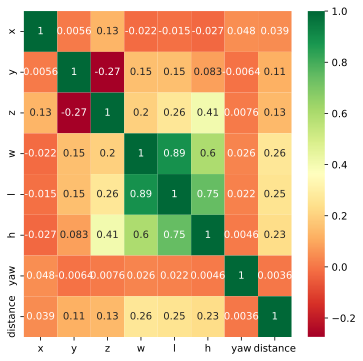

In [26]:
_,ax = plt.subplots(figsize=(6,6))
columns = ['type','x','y','z','w','l','h','yaw','distance']
sns.heatmap(ground_truth[columns].corr(),annot=True,cmap='RdYlGn',ax=ax)